In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Q1: Plot temperature

In [ ]:
# plot min max data
max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
month = list(range(0, 12))
month

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

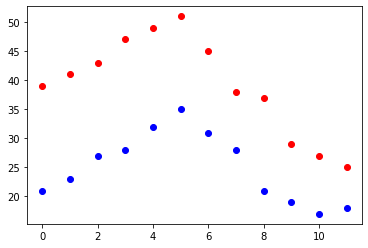

In [ ]:
ax = plt.subplot()
# ax.plot(month, min, 'blue')
ax.scatter(x=month, y=min, c='blue')
ax.scatter(x=month, y=max, c='red')

In [ ]:
from scipy import optimize
import numpy as np

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      min, [-40, 20, 0])

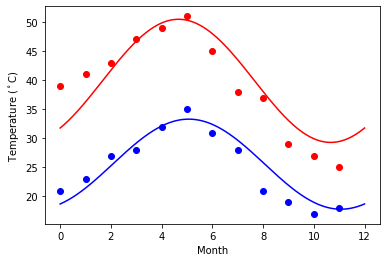

In [ ]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(month, max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Q2: Titanic Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


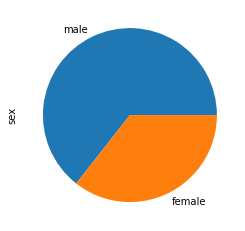

In [ ]:
df['sex'].value_counts().plot(kind='pie');

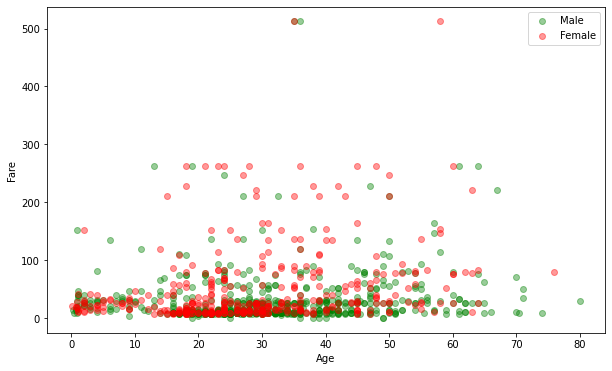

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y=df.loc[df['sex'] == 'male', 'fare'],x=df.loc[df['sex'] == 'male', 'age'], c='green', alpha=0.4, label='Male')
plt.scatter(y=df.loc[df['sex'] == 'female', 'fare'],x=df.loc[df['sex'] == 'female', 'age'], c='red', alpha=0.4, label='Female')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()